In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font',family='AppleGothic')

In [2]:
df_humid=pd.read_csv('./raw_data/서귀포_humid_.csv',encoding='cp949',header=[7])
df_temp=pd.read_csv('./raw_data/서귀포_temp_.csv',encoding='cp949',header=[7])

df_temp.reset_index(inplace=True)
df_temp.columns = list(df_temp.columns)[1:] + ['asdf']

df_서귀포=df_temp.loc[:,['지점명', '일시', '평균기온(℃)']].merge(df_humid.loc[:,['지점명', '일시', '평균습도(%rh)']])

In [3]:
df_humid=pd.read_csv('./raw_data/제주_humid_.csv',encoding='cp949',header=[7])
df_temp=pd.read_csv('./raw_data/제주_temp_.csv',encoding='cp949',header=[7])

df_temp.reset_index(inplace=True)
df_temp.columns = list(df_temp.columns)[1:] + ['asdf']

df_제주=df_temp.loc[:,['지점명', '일시', '평균기온(℃)']].merge(df_humid.loc[:,['지점명', '일시', '평균습도(%rh)']])

In [4]:
df_main=pd.concat([df_서귀포,df_제주])

In [5]:
df_main.set_index('일시',inplace=True)
df_main.index = pd.to_datetime( df_main.index,format="%Y-%m-%d")

df_main['year'] = df_main.index.year
df_main['month'] = df_main.index.month

In [6]:
df_main[df_main['지점명']=='서귀포'].groupby(['year','month']).median(numeric_only=True).reset_index().iloc[:,-1]

0      61.00
1      63.70
2      48.00
3      61.95
4      79.40
       ...  
139    86.50
140    71.40
141    67.00
142    67.20
143    66.95
Name: 평균습도(%rh), Length: 144, dtype: float64

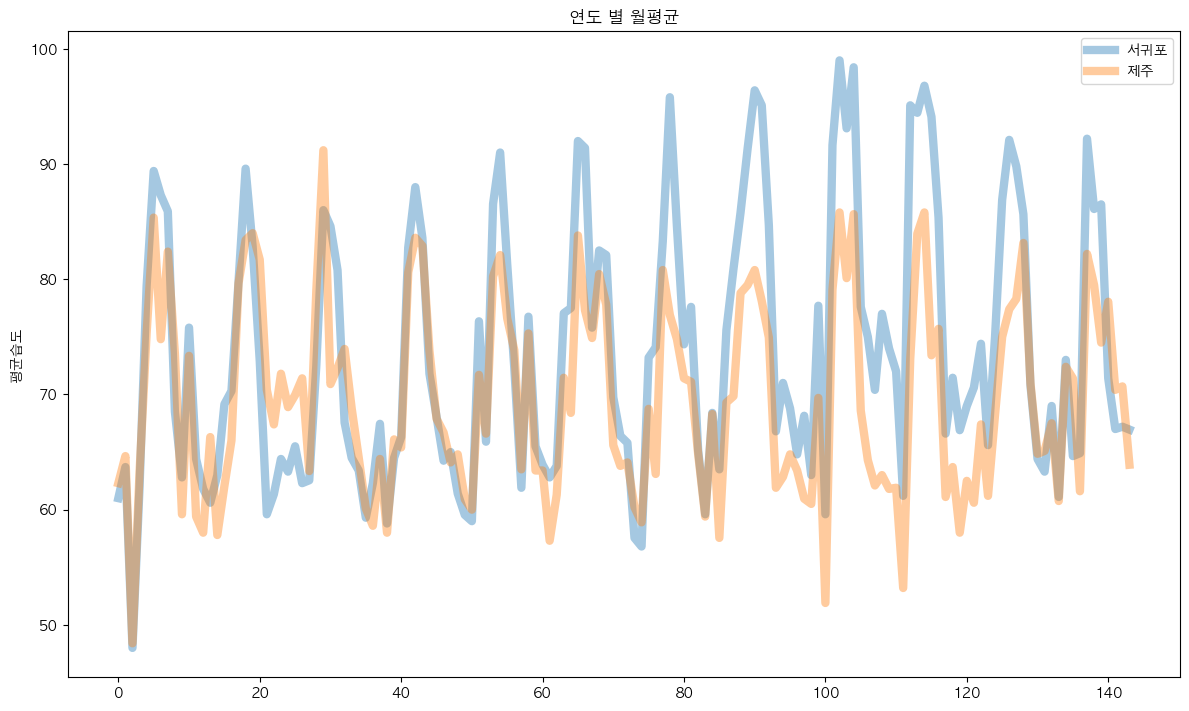

In [7]:

df_main[df_main['지점명']=='서귀포'].groupby(['year','month']).median(numeric_only=True).reset_index().iloc[:,-1].plot(figsize=(12,7),label='서귀포',alpha=0.4,lw=6)
df_main[df_main['지점명']=='제주'].groupby(['year','month']).median(numeric_only=True).reset_index().iloc[:,-1].plot(figsize=(12,7),label='제주',alpha=0.4,lw=6)
plt.legend()
plt.ylabel('평균습도')
plt.tight_layout()
plt.title('연도 별 월평균')
plt.show(
)

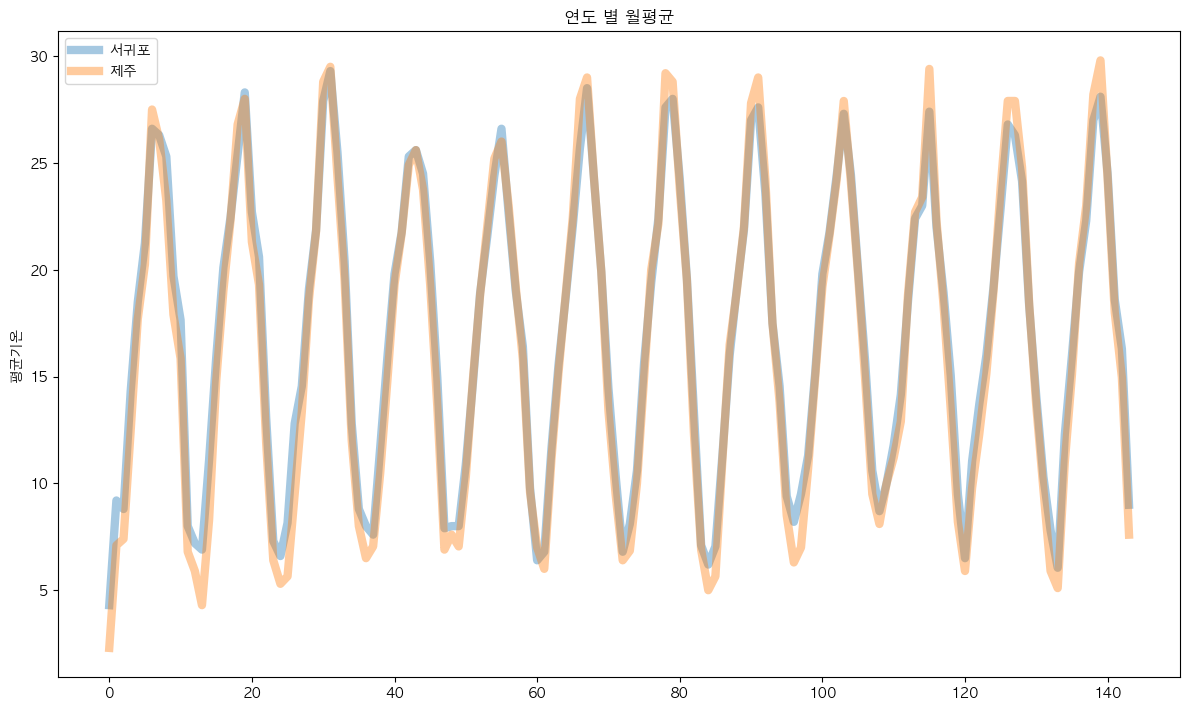

In [8]:

df_main[df_main['지점명']=='서귀포'].groupby(['year','month']).median(numeric_only=True).reset_index().iloc[:,-2].plot(figsize=(12,7),label='서귀포',alpha=0.4,lw=6)
df_main[df_main['지점명']=='제주'].groupby(['year','month']).median(numeric_only=True).reset_index().iloc[:,-2].plot(figsize=(12,7),label='제주',alpha=0.4,lw=6)
plt.legend()
plt.ylabel('평균기온')
plt.tight_layout()
plt.title('연도 별 월평균')
plt.show()

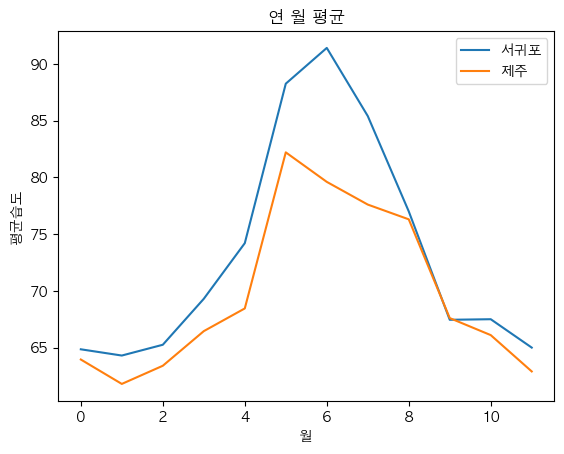

In [9]:
df_main.groupby(['지점명','month']).median().reset_index()[df_main.groupby(['지점명','month']).median().reset_index()['지점명']=='서귀포'].iloc[:,-2].plot(label='서귀포')
df_main.groupby(['지점명','month']).median().reset_index()[df_main.groupby(['지점명','month']).median().reset_index()['지점명']=='제주'].iloc[:,-2].reset_index(drop=True).plot(label='제주')

plt.ylabel('평균습도')
plt.xlabel('월')
plt.legend()
plt.title('연 월 평균')
plt.show()

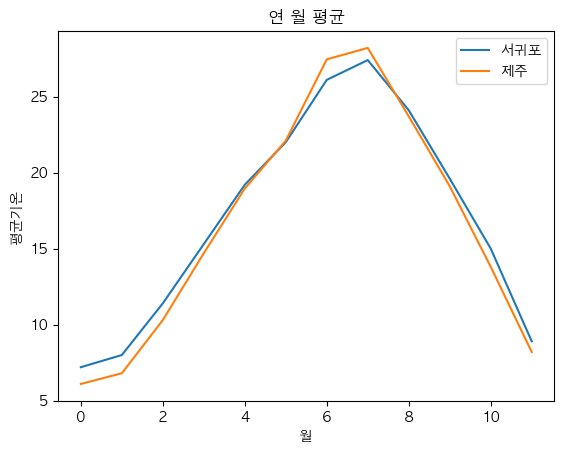

In [10]:
df_main.groupby(['지점명','month']).median().reset_index()[df_main.groupby(['지점명','month']).median().reset_index()['지점명']=='서귀포'].iloc[:,-3].plot(label='서귀포')
df_main.groupby(['지점명','month']).median().reset_index()[df_main.groupby(['지점명','month']).median().reset_index()['지점명']=='제주'].iloc[:,-3].reset_index(drop=True).plot(label='제주')
plt.ylabel('평균기온')
plt.xlabel('월')
plt.title('연 월 평균')
plt.legend()
plt.show()